##El problema

La Unidad 6 de Investigación Médica Naval del Departamento de Defensa y el Centro de Vigilancia Sanitaria de las Fuerzas Armadas, en colaboración con el gobierno peruano y las universidades de EE. UU, han obtenidos datos de vigilancia del Dengue que son proporcionados por los Centros para el Control y la Prevención de Enfermedades de EE. UU, Administración Nacional Oceánica y Atmosférica (NOAA), una agencia del Departamento de Comercio de los Estados Unidos.

El problema consiste en predecir la propagacion del Dengue para dos ciudades, San Juan e Iquitos, con datos de prueba para cada ciudad que abarcan 5 y 3 años respectivamente.

Se usará análisis de regresión con el fin de capturar la relación entre características y el número de contagiados por dengue en un modelo.

##0. Carga de Datos
Cargaremos los datos de la misma forma que lo hemos hecho otras veces en Google Collaboratory.


Carga de datos de Dengue Features Train

In [1]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


Posteriomente lo cargamos los datos de Dengue Features Train en un DataFrame de Pandas con el nombre de df_train


In [2]:
# 0. load data in DataFrame
import pandas as pd
import io

df_train = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col=['city', 'year', 'weekofyear'])
df_train


week_start_date  ...  station_precip_mm
city year weekofyear                  ...                   
sj   1990 18              1990-04-30  ...               16.0
          19              1990-05-07  ...                8.6
          20              1990-05-14  ...               41.4
          21              1990-05-21  ...                4.0
          22              1990-05-28  ...                5.8
...                              ...  ...                ...
iq   2010 21              2010-05-28  ...               27.0
          22              2010-06-04  ...               36.6
          23              2010-06-11  ...                7.4
          24              2010-06-18  ...               16.0
          25              2010-06-25  ...               20.4

[1456 rows x 21 columns]

Cargamos los datos de Dengue Features Test

In [3]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving dengue_features_test.csv to dengue_features_test.csv
User uploaded file "dengue_features_test.csv" with length 82465 bytes


Posteriomente lo cargamos los datos de Dengue Features Train en un DataFrame de Pandas con el nombre de df_test

In [4]:
# 0. load data in DataFrame
import pandas as pd
import io

df_test = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col=['city', 'year', 'weekofyear'])
df_test

week_start_date  ...  station_precip_mm
city year weekofyear                  ...                   
sj   2008 18              2008-04-29  ...               75.2
          19              2008-05-06  ...               34.3
          20              2008-05-13  ...                3.0
          21              2008-05-20  ...                0.3
          22              2008-05-27  ...               84.1
...                              ...  ...                ...
iq   2013 22              2013-05-28  ...               33.0
          23              2013-06-04  ...               68.0
          24              2013-06-11  ...               93.2
          25              2013-06-18  ...               34.1
          26              2013-06-25  ...               14.9

[416 rows x 21 columns]

Cargamos los datos de Dengue Labels Train

In [5]:
# 0. load data from file
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving dengue_labels_train.csv to dengue_labels_train.csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes


Posteriomente lo cargamos los datos de Dengue Labels Train en un DataFrame de Pandas con el nombre de df_labels

In [6]:
# 0. load data in DataFrame
import pandas as pd
import io

df_labels = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col=['city', 'year', 'weekofyear']) 
df_labels.head()

total_cases
city year weekofyear             
sj   1990 18                    4
          19                    5
          20                    4
          21                    3
          22                    6

Realizamos una union de df_train y df_labels para obtener el campo Total_cases.

In [7]:
df_train = pd.merge(df_train, df_labels, on=['city', 'year', 'weekofyear'])
df_train

week_start_date   ndvi_ne  ...  station_precip_mm  total_cases
city year weekofyear                            ...                                
sj   1990 18              1990-04-30  0.122600  ...               16.0            4
          19              1990-05-07  0.169900  ...                8.6            5
          20              1990-05-14  0.032250  ...               41.4            4
          21              1990-05-21  0.128633  ...                4.0            3
          22              1990-05-28  0.196200  ...                5.8            6
...                              ...       ...  ...                ...          ...
iq   2010 21              2010-05-28  0.342750  ...               27.0            5
          22              2010-06-04  0.160157  ...               36.6            8
          23              2010-06-11  0.247057  ...                7.4            1
          24              2010-06-18  0.333914  ...               16.0            1
          25              2010-06-25  0.298186  ...               20.4            4

[1456 rows x 22 columns]

Posteriormente seleccionamos las variables con las que trabajar.

Es importante seleccionar las características cuando se va a resolver un problema mediante KNN ya que muchas variables pueden distorsionar el resultado del algoritmo que está basado en la distancia.

Utilizaremos la correlación entre cada una de las características y la variable a predecir.

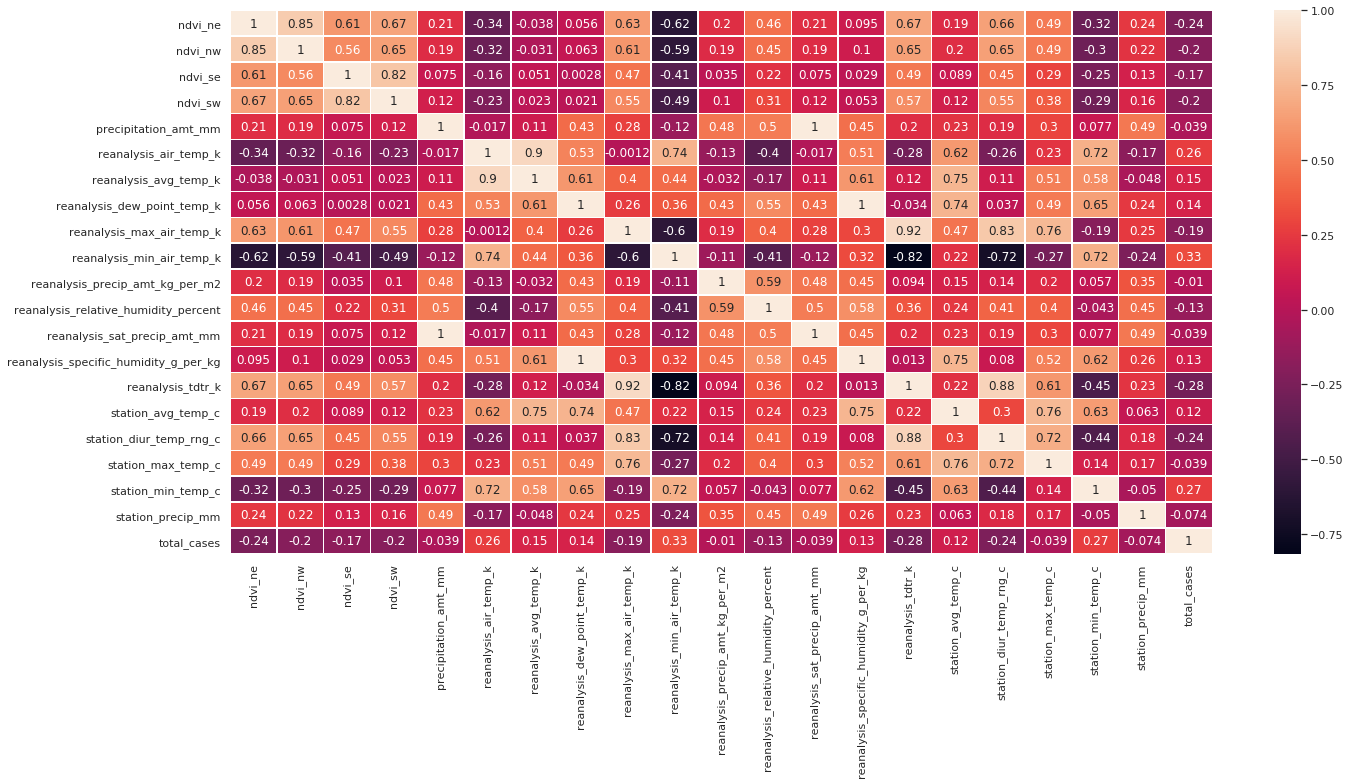

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
fig, ax = plt.subplots(figsize=(22,10))
sns.heatmap(df_train.corr(), annot=True, linewidths=.5, ax=ax)

Seleccionamos aquellas caracteristicas que mediante análisis de correlaciones, nos han dado un valor superior a 0.20 o menor -0.20.


In [ ]:
pd.set_option('display.max_rows', 1456)
# Seleccionamos las caracteristicas para el df_Train
df_train2 = df_train[['ndvi_ne', 'ndvi_nw', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c', 'total_cases']]
df_train2


Podemos observar que la columna 'ndvi_ne' posee muchos NaNs, por lo tanto procedemos a la eliminacion de esta columna. 

In [ ]:
df_train3 = df_train2.drop('ndvi_ne', axis=1)
df_train3

Realizamos una limpieza de los datos para eliminar los NaNs

In [11]:
if df_train3.isnull().values.any():
  df_train3 = df_train3.fillna(df_train3.mean())
df_train3.isnull().values.any()

False

In [ ]:
# Seleccionamos las caracteristicas para el df_Test
df_test = df_test[['ndvi_nw', 'ndvi_sw', 'reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_diur_temp_rng_c', 'station_min_temp_c']]
df_test

In [13]:
# Elimnacion de los NaNs con la media
if df_test.isnull().values.any():
  df_test = df_test.fillna(df_test.mean())
df_test.isnull().values.any()

False

# 2. PARAMETRO DE OPTIMIZACION





Todo modelos de aprendizaje automático necesitan de cierta parametrización con el fin de que su comportamiento se ajuste mejor a cada problema concreto. Según la naturaleza del modelo este puede tener muchos parámetros y encontrar la mejor combinación de los mismos puede ser tratado como un problema de búsqueda/optimización.

Este problema es denominado habitualmente **optimización de hiperparámetros**, donde los parámetros del algoritmo se denominan hiperparámetros, mientras que los coeficientes encontrados por el propio algoritmo de aprendizaje se denominan parámetros.

El planteamiento será del de buscar aquella parametrización que ofrezca los resultados de mayor calidad (con respecto a las métricas establecidas) y de mayor robustez.

Utilizaremos la libreria de machine learning Scikit-learn el cual proporciona diferentes herramientas para que la optimización de estos hiperparámetros pueda ser lo más sencilla posible. En concreto ofrece dos alternativas, la búsqueda en cuadrícula (**grid search**) y la búsqueda aleatoria (**RandomSearch**)


In [ ]:
# reseteamos el index con el fin de no evitar problemas en la validación cruzada
df_train3.reset_index(drop = True, inplace = True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Para utilizar estas herramientas de búsqueda, primero necesitamos crear el conjunto de parámetros a muestrear durante el proceso de optimización.

Y crear (construir) el elemento que va a ser nuestro regresor


In [ ]:
regressor = RandomForestRegressor()

## GridSearch

La búsqueda en cuadrícula es un enfoque de ajuste de parámetros que permite construir y evaluar metódicamente un modelo para cada combinación de parámetros de algoritmo especificados en una cuadrícula.

In [ ]:
# Se ha usado 5 arboles en random forest para mayor precision en la optimizacion
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128],   # Numero de arboles en random forest
              "max_features": ['auto', 'sqrt'],# Número de características a considerar en cada división
              "max_depth": [8, 4, 2],          # Número máximo de niveles en el árbol. 
              "min_samples_split": [2, 4, 6],  # Número mínimo de muestras requeridas para dividir un nodo
              "min_samples_leaf": [8, 12, 16], # Número mínimo de muestras requeridas en cada nodo hoja
              "bootstrap": [True, False]       # Método de selección de muestras para entrenar cada árbol.
            }

In [27]:
# Creamos nuestra estructura de busqueda por validacion cruzada. cv = intervalo de distribucion cruzada
# Entre mayor sea el numero de cross validation (cv), mejor es el aprendizaje
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_dist, cv = 10)

# Ajustar el modelo de busqueda aleatorio
grid_regres.fit(X = df_train3.drop(['total_cases'], axis=1), 
                           y = df_train3['total_cases'])

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [29]:
# Elegimos el mejor estimador
grid_regres.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=16,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=32, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# Elegir el mejor
best_grid = grid_regres.best_estimator_

# Ajuste y predicción
best_grid.fit(X = df_train3.drop(['total_cases'], axis=1), y = df_train3['total_cases'])
y_pred = best_grid.predict(X = df_test) 


Guardamos el fichero de resultado en el disco.

In [ ]:
# round the result and cast to int
import numpy as np
import pandas as pd

res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame(res, index=df_test.index, columns=['total_cases'])

from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = True)
  
files.download('result.csv')

## RandomizedSearch

Para utilizar RandomizedSearchCV, primero necesitamos crear el conjunto de parámetros a muestrear durante el proceso de optimización.

In [ ]:
param_dist = {"n_estimators": [4, 8, 16, 32, 64, 128], # Number of trees in random forest
              "max_features": ['auto', 'sqrt'], # Number of features to consider at every split
              "max_depth": [16, 12,8,4, 2,None], # Maximum number of levels in tree
              "min_samples_split": sp_randint(2, 50), #  Minimum number of samples required to split a node
              "min_samples_leaf": sp_randint(1, 50), # Minimum number of samples required at each leaf node
              "bootstrap": [True, False], # Method of selecting samples for training each tree
              "criterion": ["mse", "mae"]}

En cada iteración, el algoritmo elegirá una combinación diferente de las características. Si se probaran de forma exhaustiva todas las características el problema se volvería muy costoso computacionalmente. Al menos al utilizar búsqueda aleatoria se seleccionará al azar una muestra de las mismas para buscar en un reducido pero significativo rango de valores.


Los argumentos más importantes en RandomizedSearchCV son *n_iter*, que controla el número de combinaciones diferentes a probar, y *cv*, que es el número de *cruces* a usar para la validación cruzada. Más iteraciones cubrirán un espacio de búsqueda más amplio y más *cruces* de cv reducen las posibilidades de sobreaprendizaje, pero al aumentar cada una de ellas se incrementará el tiempo de ejecución. 

Vamos a ejecutarla utilizando la validación cruzada (5-fold) y posteriormente busca entre 100 combinaciones diferentes de entre las especificadas

In [34]:
rnd_regres = RandomizedSearchCV(estimator = regressor, param_distributions = param_dist, 
                               n_iter = 100, cv = 10, random_state=0, n_jobs = -1)

# Fit the random search model
rnd_regres.fit(X = df_train3.drop(['total_cases'], axis=1), 
                           y = df_train3['total_cases'])

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [35]:
rnd_regres.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 41,
 'min_samples_split': 38,
 'n_estimators': 4}

Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

Recordamos que al final del paso 1 hemos dividido en entrenamiento/tuneado y test

Posteriormente, vamos a ejecutar el modelo con la mejor parametrización que hayamos obtenido anteriormente

In [ ]:
# choose the best
best_random = rnd_regres.best_estimator_
# fit and predict
best_random.fit(X = df_train3.drop(['total_cases'], axis=1), y = df_train3['total_cases'])
y_pred = best_random.predict(X = df_test)

Guardamos fichero de resultado en disco

In [ ]:
# round the result and cast to int
import numpy as np
import pandas as pd

res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame(res, index=df_test.index, columns=['total_cases'])

from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = True)
  
files.download('result.csv')

## Boosting

Vamos a utilizar las mismas técnicas para optimizar los párametros de los algortimos basados en Boosting.

En primer lugar Adaboost, con parámetros como el número de árboles, el coeficiente de aprendizaje y la función de pérdida. 


In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

param_dist = {
 "n_estimators": [4, 8, 16, 32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1],
 "loss" : ['linear', 'square', 'exponential']
 }

grid_ada = GridSearchCV(AdaBoostRegressor(DecisionTreeRegressor(criterion='mae')),
                        param_grid = param_dist, cv=10)

grid_ada.fit(X = df_train3.drop(['total_cases'], axis=1),y = df_train3['total_cases'])


best_ada = grid_ada.best_estimator_
print (best_ada)
# fit and predict
best_ada.fit( X = df_train3.drop(['total_cases'], axis=1), y = df_train3['total_cases'])
y_pred = best_ada.predict(X = df_test)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mae',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
               

Guardamos el fichero de resultado en disco

In [ ]:
# round the result and cast to int
import numpy as np
import pandas as pd

res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame(res, index=df_test.index, columns=['total_cases'])

from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = True)
  
files.download('result.csv')

Y finalmente lo vamos a hacer para GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

param_dist = {
 "n_estimators": [4, 8, 16, 32, 64, 128],
 "learning_rate" : [0.01,0.05,0.1,0.25,0.5],
  "max_features" : ["auto", "sqrt"],
 "loss" : ['ls', 'lad', 'huber', 'quantile'],
 "criterion": ['mae', 'friedman_mse']
 }

grid_gb = GridSearchCV(GradientBoostingRegressor(), param_grid = param_dist, cv=10)

grid_gb.fit(X = df_train3.drop(['total_cases'], axis=1),y = df_train3['total_cases'])


best_gb = grid_gb.best_estimator_
print (best_gb)
# fit and predict
best_gb.fit( X = df_train3.drop(['total_cases'], axis=1), y = df_train3['total_cases'])
y_pred = best_gb.predict(X = df_test)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.05, loss='huber', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=64,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Guardamos fichero de resultado en disco

In [ ]:
# round the result and cast to int
import numpy as np
import pandas as pd

res = np.rint(y_pred) # round
res = res.astype(int) # cast to int
# generate output
output = pd.DataFrame(res, index=df_test.index, columns=['total_cases'])

from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = True)
  
files.download('result.csv')